An autonomous system number (ASN) is a unique number assigned to an autonomous system(AS) by the Internet Assigned Numbers Authority (IANA).

An AS consists of blocks of IP addresses which have a distinctly defined policy for accessing external networks and are administered by a single organization but may be made up of several operators.

IPs of Starlink User Terminals have the ASN of `14593`

Also see:
- https://www.peeringdb.com/net/18747
- https://www.measurementlab.net/data/


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
ndt5_df   = pd.read_csv("./mlab_starlink_data/ndt5_tableentrystats.csv").set_index("month")
ndt7_df   = pd.read_csv("./mlab_starlink_data/ndt7_tableentrystats.csv").set_index("month")
web100_df = pd.read_csv("./mlab_starlink_data/web100_tableentrystats.csv").set_index("month")

<AxesSubplot: xlabel='month'>

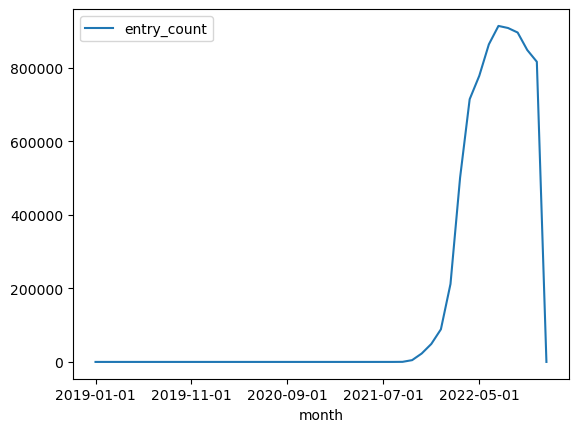

In [12]:
ndt7_df.plot()

<AxesSubplot: ylabel='entry_count'>

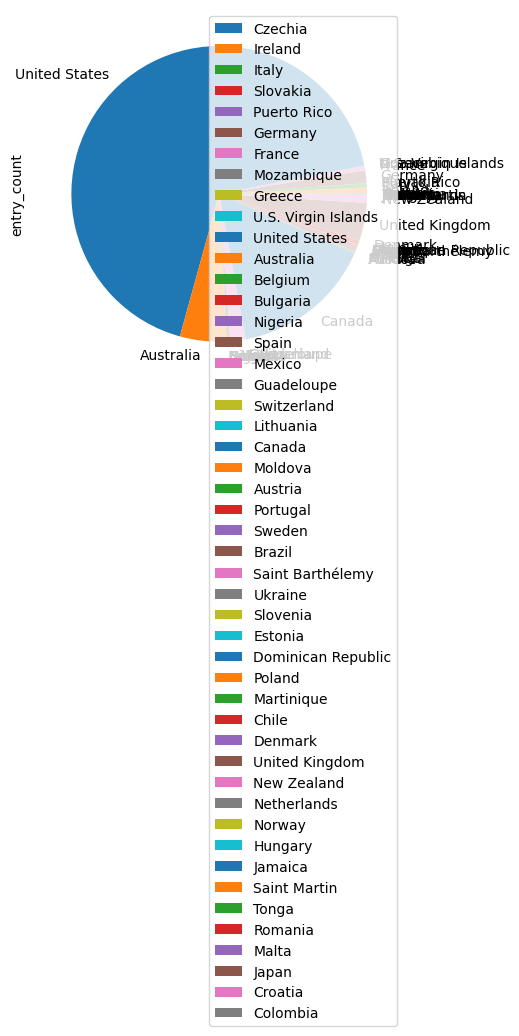

In [16]:
ndt7_df   = pd.read_csv("./mlab_starlink_data/ndt7_countryentrycount.csv").set_index("CountryName")
ndt7_df.plot(kind='pie', y='entry_count')

In [61]:
ndt7_df   = pd.read_csv("./mlab_starlink_data/ndt7_geohash2diagnostic.csv").set_index("geohash")
ndt7_df

,avg_minrtt,avg_meanthroughputmbps,avg_lossraate,count_measurements
geohash,,,,
d71qk,57.064407,37.146222,0.029217,54
ezjmg,43.269161,52.362320,0.017507,21869
u24mf,62.901609,38.108679,0.043259,23
u2fkf,57.864467,40.594834,0.021821,4596
c2wdn,32.521498,27.276466,0.020578,209
...,...,...,...,...
u1514,57.997007,41.636197,0.017741,2149
u8ke2,103.045750,3.671302,0.000437,4
d2g66,5769.406556,13.482547,0.044531,3044


In [90]:
def get_sizes(df):
    tp_max = df["avg_meanthroughputmbps"].max()
    tp_min = df["avg_meanthroughputmbps"].min()
    sizes = [100*(tp/tp_max) + 10 for tp in df["avg_meanthroughputmbps"]]
    return sizes

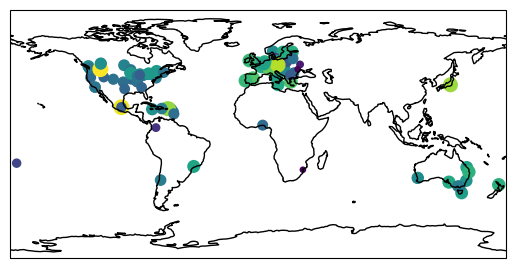

In [92]:
import geohash
import numpy as np
import cartopy.crs as ccrs
points = [geohash.decode(gh) for gh in ndt7_df.index]
points = np.array(points)

sizes = get_sizes(ndt7_df)

def visualize_cords(points, sizes, show=True, ax=None, color="blue"):
    if(ax is None):
        ax = plt.axes(projection=ccrs.PlateCarree())
        #ax.stock_img()
        ax.set_extent((-180, 180, -90, 90))
        ax.coastlines()
    
    latitude, longitude = points[:, 1], points[:, 0]
    plt.scatter(latitude, longitude,
     s=sizes,
     c=sizes,
     transform=ccrs.PlateCarree(),
     )

    if(show):
        plt.show()

visualize_cords(points, sizes)